<a href="https://colab.research.google.com/github/ravidewangga/folium_project_n3ts/blob/main/Ravi_Chandra_Dewangga_X_3_folium_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

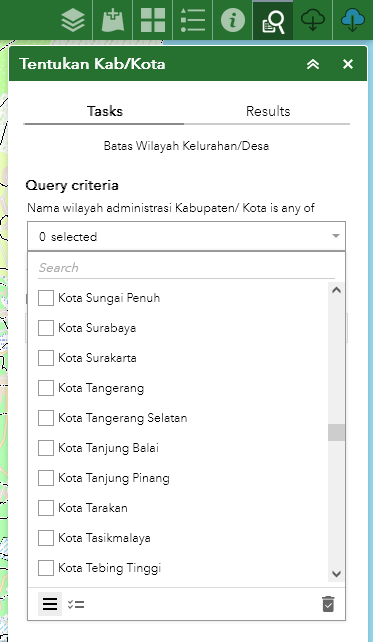

In [ ]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Sibolga']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file path
csv_path = 'data_sibolga baru.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['jumlah penduduk (jiwa)'] = csv_data['Jumlah penduduk (jiwa)'].astype(str).str.replace('.', '')
#csv_data['Jumlah penduduk (jiwa)'] = pd.to_numeric(csv_data['Jumlah penduduk (jiwa) '])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('Husein Sastranegara ', 'HUSEN SASTRANEGARA')
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('Kota Beringin', 'Kota Baringin')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

          Kelurahan  jumlah penduduk
0     SIBOLGA UTARA            23000
1      Sibolga Ilir             7274
2       Angin Nauli             4318
3  Huta Tonga-Tonga             3057
4      Hutabarangan             2416
       OBJECTID          NAMOBJ       FCODE REMARK  \
44227   44228.0        aekhabil  BA03070040   None   
44244   44245.0        aekmanis  BA03070040   None   
44249   44250.0  aekmuarapinang  BA03070040   None   
44267   44268.0   aekparombunan  BA03070040   None   
44328   44329.0      anginnauli  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
44227  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
44244  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
44249  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
44267  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
44328  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Create a base map
m = folium.Map(location=[1.7368263034504632, 98.78515669218301], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "jumlah penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='jumlah penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','jumlah penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [ ]:
# Create a base map
m = folium.Map(location=[1.7368263034504632, 98.78515669218301], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "jumlah penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah Penduduk"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('SMA sibolga.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMA sibolga")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='jumlah penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','jumlah penduduk'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: kelurahan dengan jumlam penduduk terbanyak yakni kelurahan Aek Habil dengan jumlah penduduk 11, 193 dan kelurahan Aek Parombunan dengan jumlah penduduk Parombunan.

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:
1. Aek Muara Pinang
2. Huta Barangan
3. Pancuran Bambu
4. Aek Manis
5. Pancuran Dewa
6. Pancuran Pinang
7. Pasar Belakang
8. Hutan Barangan
9. Angin Nauli
10. Simare-Mare
11. Sibolga Ilir